In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import random
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [5]:
df.dropna(inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.fillna(0)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df['occupation'] = df['occupation'].replace(['?'],'jobless')


In [8]:
df['workclass'] = df['workclass'].replace(['?'],'others')

In [9]:
df['income'] = df['income'].replace(['<=50K'],'0')

In [10]:
df['income'] = df['income'].replace(['>50K'],'1')

**Label Encoding** - Label encoding is used to transform categorical data into numerical data. For categorical features - If we have 2 categories than we can convert into binary. If we have more than 2 categories we can use dummy variables.

In [11]:
encoding_gender = preprocessing.OneHotEncoder(sparse=False)
df['gender'] = encoding_gender.fit_transform(df[['gender']])

In [12]:
 # For more than two values - 
encoding_degree = preprocessing.OrdinalEncoder()
df['education'] = encoding_degree.fit_transform(df[['education']])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        48842 non-null  object 
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  float64
 4   educational-num  48842 non-null  int64  
 5   marital-status   48842 non-null  object 
 6   occupation       48842 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  float64
 10  capital-gain     48842 non-null  int64  
 11  capital-loss     48842 non-null  int64  
 12  hours-per-week   48842 non-null  int64  
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 6.0+ MB


In [14]:
df.shape

(48842, 15)

In [15]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842.000000,48842.000000,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,NaN,NaN,7,15,6,5,NaN,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,NaN,NaN,Married-civ-spouse,Prof-specialty,Husband,White,NaN,NaN,NaN,NaN,United-States,0
freq,NaN,33906,NaN,NaN,NaN,22379,6172,19716,41762,NaN,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,10.288420,10.078089,NaN,NaN,NaN,NaN,0.331518,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,3.874492,2.570973,NaN,NaN,NaN,NaN,0.470764,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,9.000000,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,11.000000,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,12.000000,12.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,45.000000,NaN,NaN


**Value counts**

<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes.</p>


In [16]:
df.age.value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [17]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [18]:
df.education.value_counts()

11.0    15784
15.0    10878
9.0      8025
12.0     2657
8.0      2061
1.0      1812
7.0      1601
0.0      1389
5.0       955
14.0      834
6.0       756
2.0       657
10.0      594
4.0       509
3.0       247
13.0       83
Name: education, dtype: int64

In [19]:
df.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [20]:
df.occupation.value_counts

<bound method IndexOpsMixin.value_counts of 0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                  jobless
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object>

**GROUPBY**

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [21]:
df.groupby("education")['income'].sum()

education
0.0     0000000100000100000000000000000000000000100000...
1.0     0000000000000001000000000000000000000000000000...
2.0     0000000000000000001000000000000000000000000000...
3.0     0001000000000000000000000000000000000000100000...
4.0     0000010000000000000000000000100010000000001001...
5.0     0000000010000000000000000000000001000000000000...
6.0     0010100000000010010000000000000000000000000000...
7.0     1101000001000001010001010010100010011100000010...
8.0     1101001000010000000001000000000100010001101010...
9.0     0100011000000101100000011000010000110001000111...
10.0    1111111001001100110110001110110101110110111111...
11.0    0010010010000000001010000000001010100000000000...
12.0    1101101001000000000110000110101011111111101101...
13.0    0000000000000000000000000000000100000000000000...
14.0    1100111011110011111101111111101111101111111011...
15.0    1000001000000001000000000000000000000110110000...
Name: income, dtype: object

In [22]:
df['education'].unique()

array([ 1., 11.,  7., 15.,  0., 14.,  5.,  9., 12., 10.,  4.,  8.,  6.,
        2.,  3., 13.])

In [23]:
df_group_one = df[['capital-gain','capital-loss','age','hours-per-week']]

In [24]:
df_group_one = df_group_one.groupby(['age'],as_index=False).mean()
df_group_one

,age,capital-gain,capital-loss,hours-per-week
0,17,81.245378,33.302521,21.137815
1,18,76.163573,37.852668,25.745940
2,19,126.797721,42.579297,30.560304
3,20,66.937107,35.743935,32.432165
4,21,169.385949,40.899635,34.252737
...,...,...,...,...
69,86,0.000000,0.000000,40.000000
70,87,0.000000,0.000000,7.000000
71,88,1069.666667,302.666667,35.833333
72,89,0.000000,0.000000,30.000000


In [25]:
df_gptest = df[['capital-gain','capital-loss','age','hours-per-week']]
grouped_test1 = df_gptest.groupby(['capital-gain','capital-loss'],as_index=False).mean()
grouped_test1

,capital-gain,capital-loss,age,hours-per-week
0,0,0,37.955038,39.974815
1,0,155,28.000000,40.000000
2,0,213,38.600000,41.000000
3,0,323,44.400000,37.000000
4,0,419,54.000000,11.666667
...,...,...,...,...
216,25236,0,45.214286,43.714286
217,27828,0,43.344828,48.120690
218,34095,0,24.666667,24.833333
219,41310,0,42.000000,54.666667


In [26]:
grouped_pivot = grouped_test1.pivot(index='capital-gain',columns='capital-loss')
grouped_pivot

age                                                 \
capital-loss       0     155   213   323   419        625   653   810    
capital-gain                                                             
0             37.955038  28.0  38.6  44.4  54.0  41.705882  44.5  67.0   
114           31.750000   NaN   NaN   NaN   NaN        NaN   NaN   NaN   
401           72.600000   NaN   NaN   NaN   NaN        NaN   NaN   NaN   
594           25.019231   NaN   NaN   NaN   NaN        NaN   NaN   NaN   
914           43.200000   NaN   NaN   NaN   NaN        NaN   NaN   NaN   
...                 ...   ...   ...   ...   ...        ...   ...   ...   
25236         45.214286   NaN   NaN   NaN   NaN        NaN   NaN   NaN   
27828         43.344828   NaN   NaN   NaN   NaN        NaN   NaN   NaN   
34095         24.666667   NaN   NaN   NaN   NaN        NaN   NaN   NaN   
41310         42.000000   NaN   NaN   NaN   NaN        NaN   NaN   NaN   
99999         46.610656   NaN   NaN   NaN   NaN        NaN   NaN   NaN   

                               ... hours-per-week                         \
capital-loss       880   974   ...           2559       2603  2754  2824   
capital-gain                   ...                                         
0             37.166667  30.5  ...      53.117647  40.571429  33.5  46.0   
114                 NaN   NaN  ...            NaN        NaN   NaN   NaN   
401                 NaN   NaN  ...            NaN        NaN   NaN   NaN   
594                 NaN   NaN  ...            NaN        NaN   NaN   NaN   
914                 NaN   NaN  ...            NaN        NaN   NaN   NaN   
...                 ...   ...  ...            ...        ...   ...   ...   
25236               NaN   NaN  ...            NaN        NaN   NaN   NaN   
27828               NaN   NaN  ...            NaN        NaN   NaN   NaN   
34095               NaN   NaN  ...            NaN        NaN   NaN   NaN   
41310               NaN   NaN  ...            NaN        NaN   NaN   NaN   
99999               NaN   NaN  ...            NaN        NaN   NaN   NaN   

                                                       
capital-loss  3004  3175  3683  3770  3900       4356  
capital-gain                                           
0             43.0  37.5  30.0  40.5  40.0  32.666667  
114            NaN   NaN   NaN   NaN   NaN        NaN  
401            NaN   NaN   NaN   NaN   NaN        NaN  
594            NaN   NaN   NaN   NaN   NaN        NaN  
914            NaN   NaN   NaN   NaN   NaN        NaN  
...            ...   ...   ...   ...   ...        ...  
25236          NaN   NaN   NaN   NaN   NaN        NaN  
27828          NaN   NaN   NaN   NaN   NaN        NaN  
34095          NaN   NaN   NaN   NaN   NaN        NaN  
41310          NaN   NaN   NaN   NaN   NaN        NaN  
99999          NaN   NaN   NaN   NaN   NaN        NaN  

[123 rows x 198 columns]

In [27]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

age                                                 \
capital-loss       0     155   213   323   419        625   653   810    
capital-gain                                                             
0             37.955038  28.0  38.6  44.4  54.0  41.705882  44.5  67.0   
114           31.750000   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   
401           72.600000   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   
594           25.019231   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   
914           43.200000   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   
...                 ...   ...   ...   ...   ...        ...   ...   ...   
25236         45.214286   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   
27828         43.344828   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   
34095         24.666667   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   
41310         42.000000   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   
99999         46.610656   0.0   0.0   0.0   0.0   0.000000   0.0   0.0   

                               ... hours-per-week                         \
capital-loss       880   974   ...           2559       2603  2754  2824   
capital-gain                   ...                                         
0             37.166667  30.5  ...      53.117647  40.571429  33.5  46.0   
114            0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   
401            0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   
594            0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   
914            0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   
...                 ...   ...  ...            ...        ...   ...   ...   
25236          0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   
27828          0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   
34095          0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   
41310          0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   
99999          0.000000   0.0  ...       0.000000   0.000000   0.0   0.0   

                                                       
capital-loss  3004  3175  3683  3770  3900       4356  
capital-gain                                           
0             43.0  37.5  30.0  40.5  40.0  32.666667  
114            0.0   0.0   0.0   0.0   0.0   0.000000  
401            0.0   0.0   0.0   0.0   0.0   0.000000  
594            0.0   0.0   0.0   0.0   0.0   0.000000  
914            0.0   0.0   0.0   0.0   0.0   0.000000  
...            ...   ...   ...   ...   ...        ...  
25236          0.0   0.0   0.0   0.0   0.0   0.000000  
27828          0.0   0.0   0.0   0.0   0.0   0.000000  
34095          0.0   0.0   0.0   0.0   0.0   0.000000  
41310          0.0   0.0   0.0   0.0   0.0   0.000000  
99999          0.0   0.0   0.0   0.0   0.0   0.000000  

[123 rows x 198 columns]

In [28]:
df_gptest2 = df[['hours-per-week','age']]
grouped_test2 = df_gptest2.groupby(['age'],as_index= False).mean()
grouped_test2

,age,hours-per-week
0,17,21.137815
1,18,25.745940
2,19,30.560304
3,20,32.432165
4,21,34.252737
...,...,...
69,86,40.000000
70,87,7.000000
71,88,35.833333
72,89,30.000000


In [29]:
df.corr()

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,-0.015058,0.030940,-0.088120,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.022570,-0.038761,-0.027739,-0.003706,-0.004366,-0.013519
education,-0.015058,-0.022570,1.000000,0.359668,0.027041,0.028928,0.017638,0.057659
educational-num,0.030940,-0.038761,0.359668,1.000000,-0.009328,0.125146,0.080972,0.143689
gender,-0.088120,-0.027739,0.027041,-0.009328,1.000000,-0.047094,-0.045480,-0.228560
capital-gain,0.077229,-0.003706,0.028928,0.125146,-0.047094,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.017638,0.080972,-0.045480,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.057659,0.143689,-0.228560,0.082157,0.054467,1.000000


In [30]:
#df.style.background_gradient(cmap ='viridis')

<AxesSubplot:>

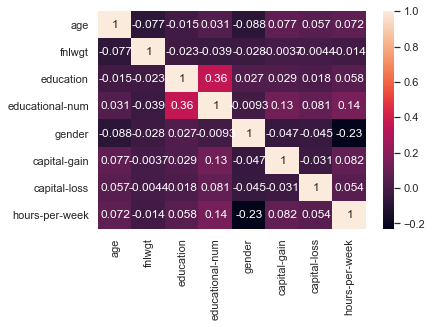

In [31]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [32]:
df.duplicated().sum()

52

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [35]:
print(df.dtypes)

age                  int64
workclass           object
fnlwgt               int64
education          float64
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender             float64
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income              object
dtype: object


**univariate Analysis**

**Box Plot**: It is a type of chart that depicts a group of numerical data through their quartiles. It is a simple way to visualize the shape of our data. It makes comparing characteristics of data between categories very easy.

<AxesSubplot:xlabel='income', ylabel='age'>

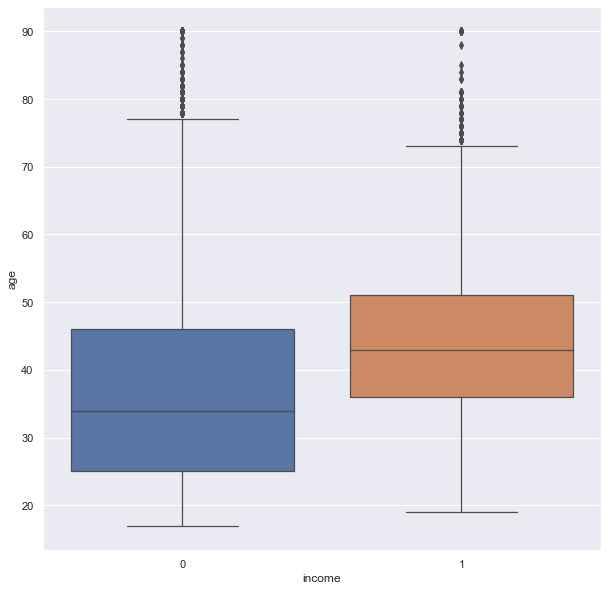

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df["age"],x=df["income"],width=0.8,linewidth=1.25)

In income, we can see we have many values which are extremely high. These are called outliers. Boxplot
helps to identify the outliers. And it also tells the mean, median, IQR.

<AxesSubplot:xlabel='hours-per-week', ylabel='income'>

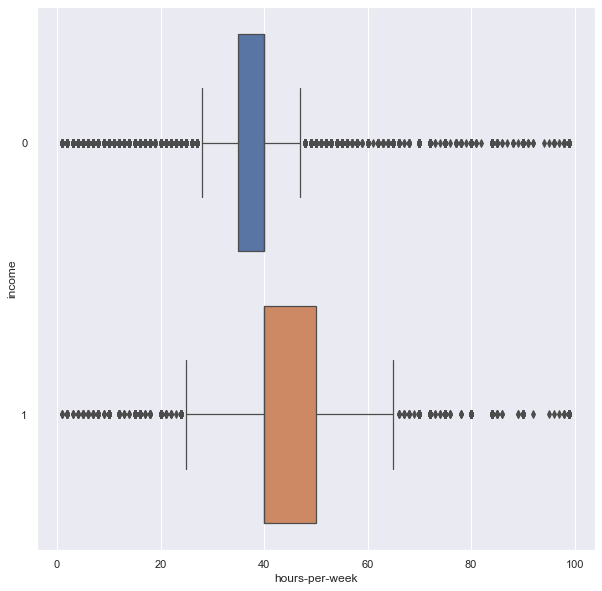

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df["hours-per-week"],y=df["income"],width=0.8,linewidth=1.25)

**regression plot**

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. This article deals with those kinds of plots in seaborn and shows the ways that can be adapted to change the size, aspect, ratio etc. of such plots.(both x and y must be numeric)

(0.0, 93.65)

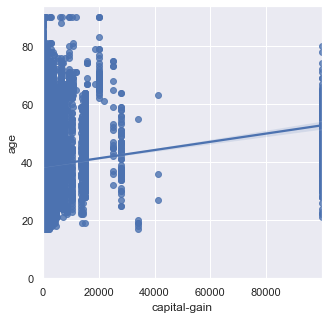

In [38]:
plt.figure(figsize=(5,5))
sns.regplot(y="age", x="capital-gain", data=df)
plt.ylim(0,)

(0.0, 4573.8)

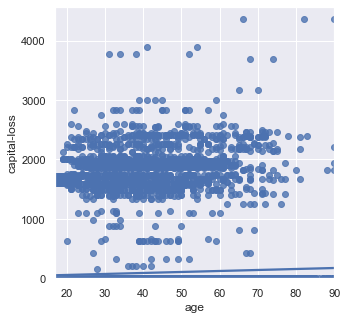

In [39]:
plt.figure(figsize=(5,5))
sns.regplot(x="age", y="capital-loss", data=df)
plt.ylim(0,)

**Displot**
It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

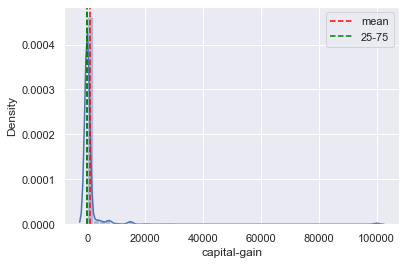

In [40]:
sns.distplot(df["capital-gain"])
plt.axvline(x=np.mean(df["capital-gain"]),c="red",ls="--",label="mean")
plt.axvline(x=np.percentile(df["capital-gain"],25),c="green",ls="--",label="25-75")
plt.axvline(x=np.percentile(df["capital-gain"],75),c="green",ls="--")
plt.legend()

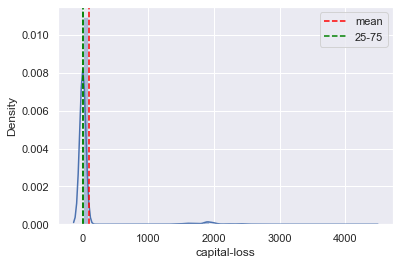

In [41]:
sns.distplot(df["capital-loss"])
plt.axvline(x=np.mean(df["capital-loss"]),c="red",ls="--",label="mean")
plt.axvline(x=np.percentile(df["capital-loss"],25),c="green",ls="--",label="25-75")
plt.axvline(x=np.percentile(df["capital-loss"],75),c="green",ls="--")
plt.legend()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

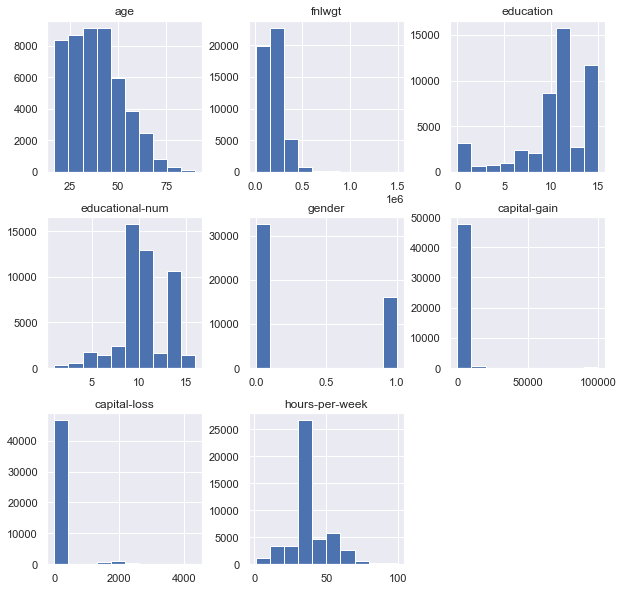

In [42]:
df.hist(figsize=(10,10),bins=10)

By above observation most of the people works 40 hours.

**Pandas Crosstab**

This method is used to compute a simple cross-tabulation of two (or more) factors. By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [43]:
pd.crosstab(df["age"], df["income"])

income,0,1
age,,
17,594,0
18,861,0
19,1042,3
20,1110,1
21,1086,6
...,...,...
86,1,0
87,3,0
88,5,1


In [44]:
pd.crosstab( df["income"], df["capital-gain"])

capital-gain,0,114,401,594,914,991,1055,1086,1111,1151,...,15831,18481,20051,22040,25124,25236,27828,34095,41310,99999
income,,,,,,,,,,,,,,,,,,,,,
0,35565,8,5,52,10,6,37,8,1,13,...,0,0,0,1,0,0,0,6,3,0
1,9190,0,0,0,0,0,0,0,0,0,...,8,2,49,0,6,14,58,0,0,244


In [45]:
pd.crosstab(df["income"],df["capital-loss"])

capital-loss,0,155,213,323,419,625,653,810,880,974,...,2559,2603,2754,2824,3004,3175,3683,3770,3900,4356
income,,,,,,,,,,,,,,,,,,,,,
0,35971,1,5,5,3,17,2,2,6,2,...,0,7,2,0,0,2,1,4,2,3
1,10537,0,0,0,0,0,2,0,0,0,...,17,0,0,14,5,0,1,0,0,0


**Countplot**

seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

If we use only one data variable instead of two data variables then it means that the axis denotes each of these data variables as an axis.

X denotes an x-axis and y denote a y-axis.

<AxesSubplot:xlabel='age', ylabel='count'>

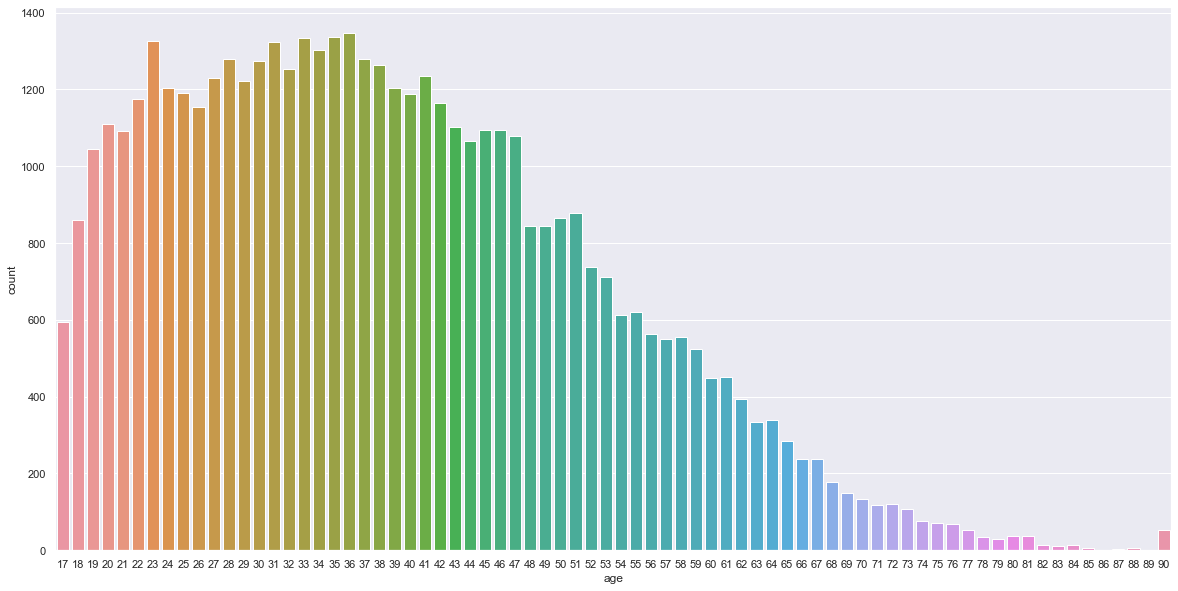

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"])

**By above observation the age 24,31,33 & 37(top most) members are present in the data set**

<AxesSubplot:xlabel='income', ylabel='count'>

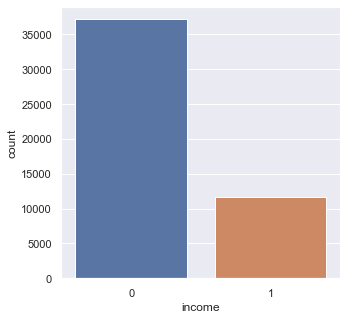

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['income'])

**By using above observation there are more who are less than 50k salary**

<AxesSubplot:xlabel='educational-num', ylabel='count'>

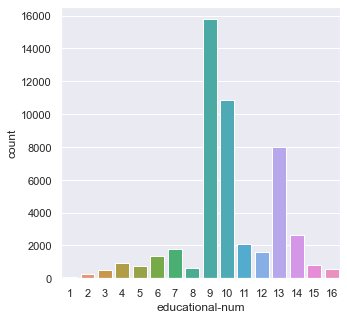

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['educational-num'])

**Bascially the 9th,10th & 13th standard are more in dataset compartive to others**

**Bivariate analysis**

Bivariate means - Two variables. We will plot the graphs for two variables. We have many graphs in it.

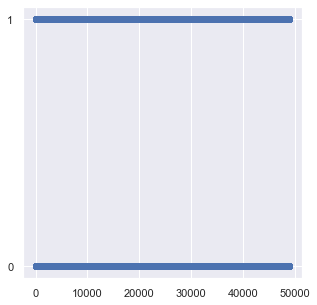

In [49]:
plt.figure(figsize=(5,5))
plt.scatter(df.index, df['income'])

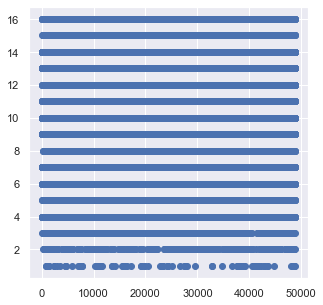

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(df.index, df['educational-num'])

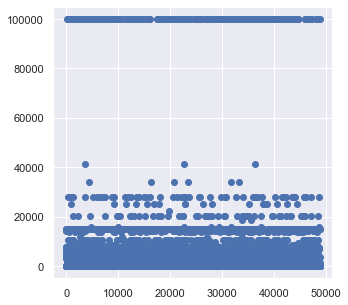

In [51]:
plt.figure(figsize=(5,5))
plt.scatter(df.index, df["capital-gain"])

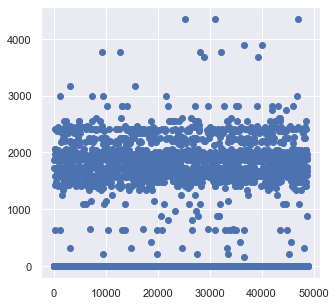

In [52]:
plt.figure(figsize=(5,5))
plt.scatter(df.index, df["capital-loss"])

**HEXBIN PLOT**

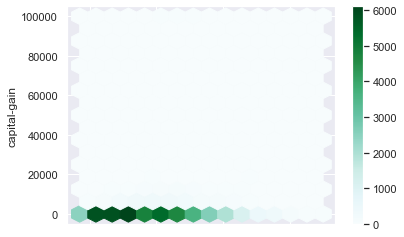

In [53]:
ax = df.plot.hexbin(x="age", y="capital-gain", gridsize=15)

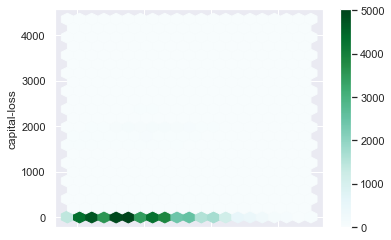

In [54]:
ax = df.plot.hexbin(x="age", y="capital-loss", gridsize=20)

In [57]:
ax = df.plot.hexbin(x="age", y='income', gridsize=20)

ValueError: hexbin requires y column to be numeric

In [59]:
print(df.dtypes)

age                  int64
workclass           object
fnlwgt               int64
education          float64
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender             float64
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income              object
dtype: object


**Pair Plot**

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

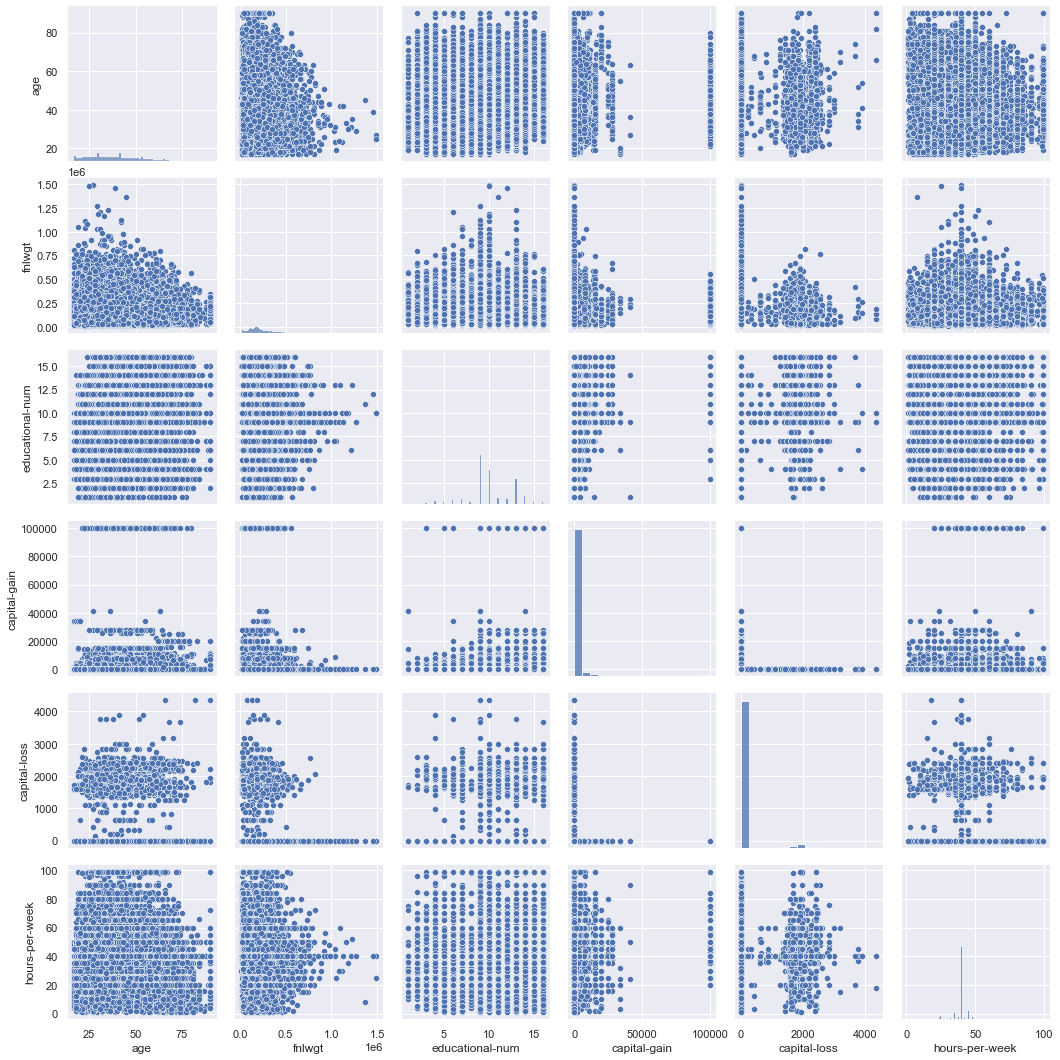

In [64]:
data1 = df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
sns.pairplot(data1)

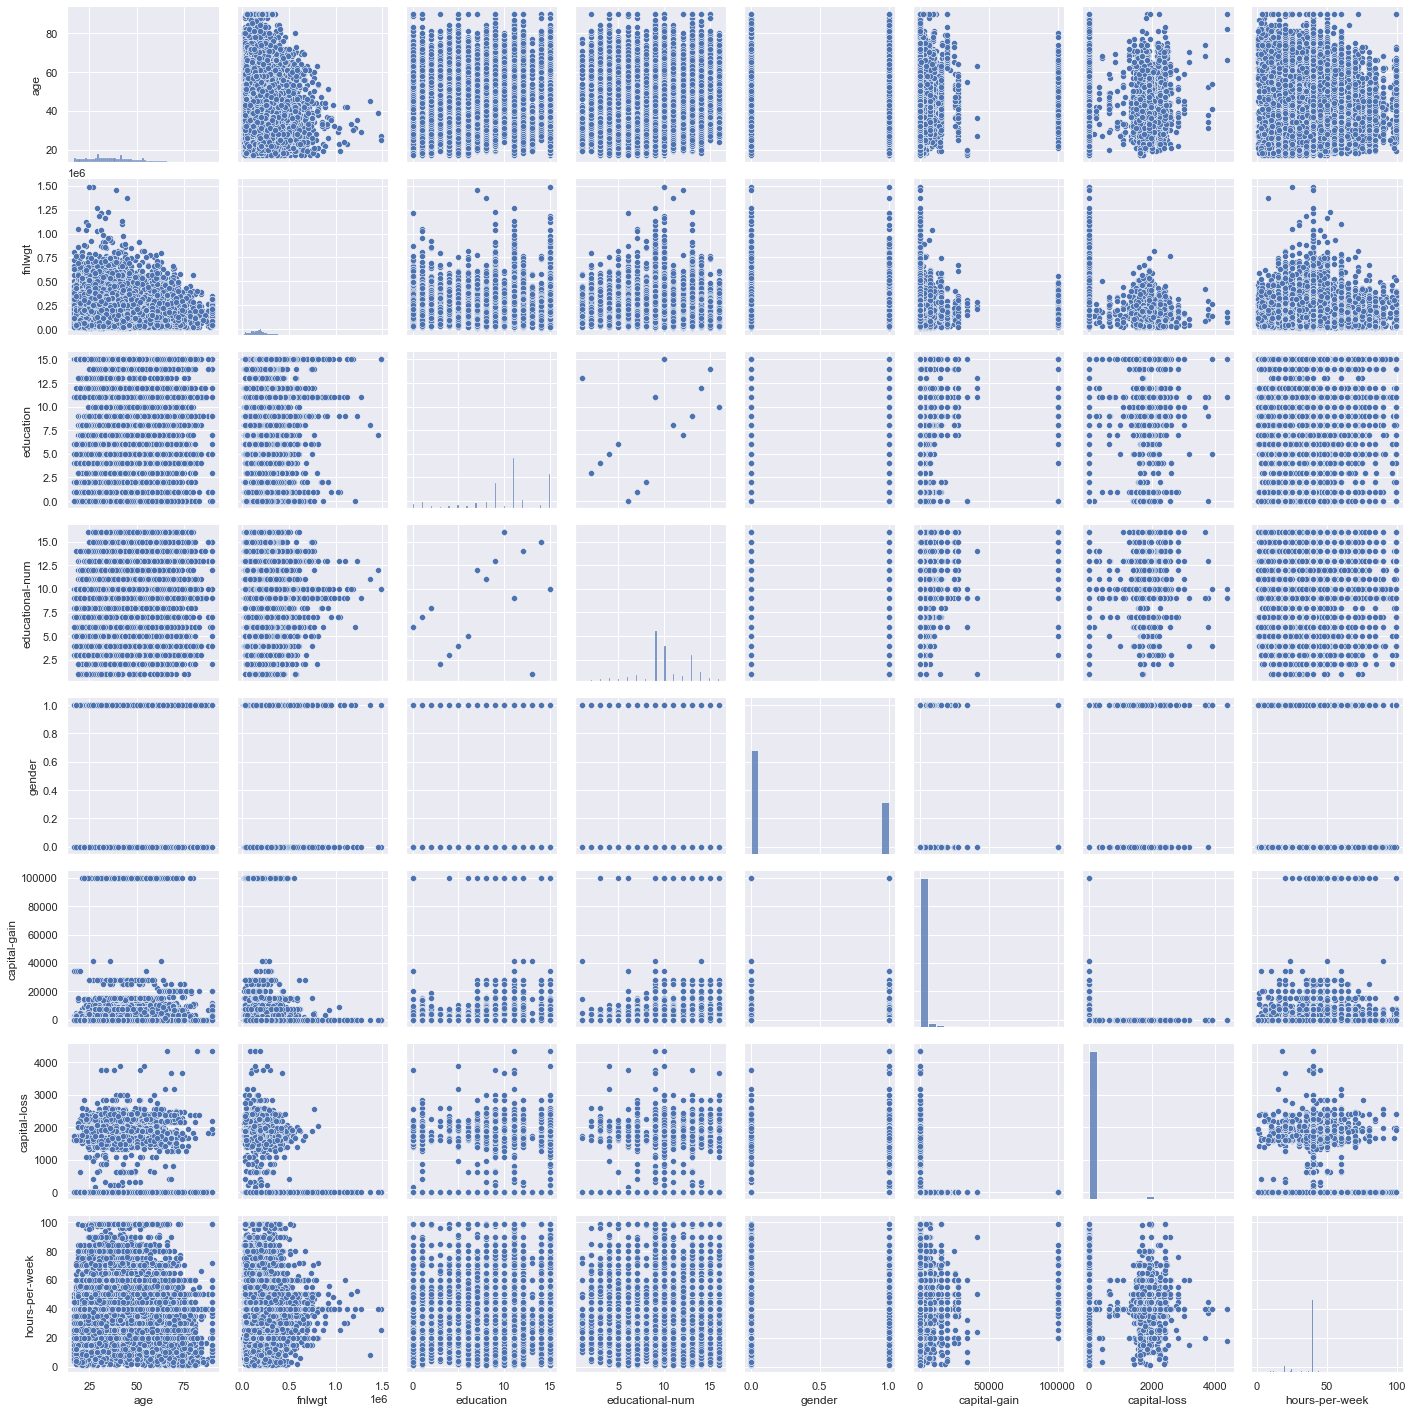

In [65]:
sns.pairplot(df)

**Barplot**

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

Text(0, 0.5, 'capital-gain')

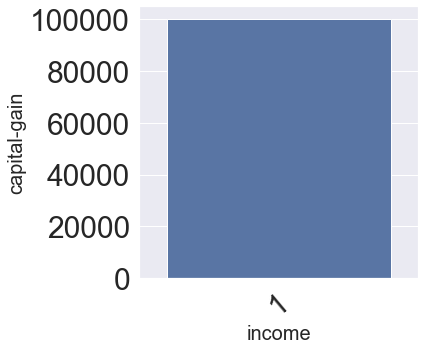

In [66]:
plt.figure(figsize=(5, 5))
data1 = df.sort_values(by=['capital-gain'], ascending=False)
sns.barplot(x='income', y='capital-gain', data=data1[:200])
plt.xticks(fontsize=30)
plt.xticks(rotation=40)
plt.yticks(fontsize=30)
plt.xlabel('income', fontsize= 20)
plt.ylabel('capital-gain', fontsize = 20)

Text(0, 0.5, 'capital-gain')

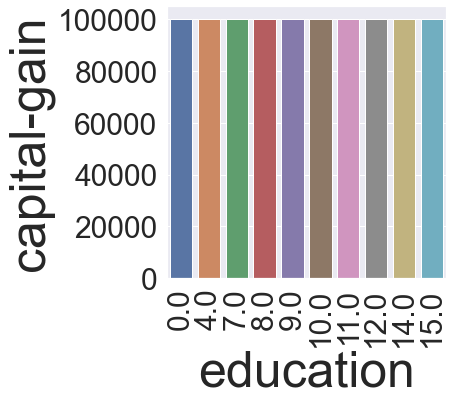

In [67]:
plt.figure(figsize=(5, 5))
data1 = df.sort_values(by=['capital-gain'], ascending=False)
sns.barplot(x='education', y='capital-gain', data=data1[:200])
plt.xticks(fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
plt.xlabel('education', fontsize= 50)
plt.ylabel('capital-gain', fontsize = 50)

Text(0, 0.5, 'occupation')

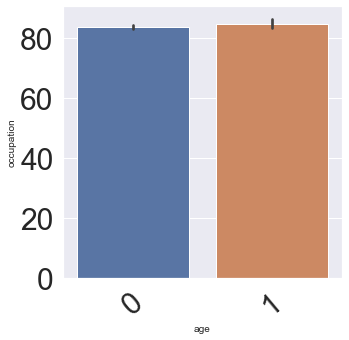

In [68]:
plt.figure(figsize=(5, 5))
data1 = df.sort_values(by=['age'], ascending=False)
sns.barplot(x='income', y='age', data=data1[:200])
plt.xticks(fontsize=30)
plt.xticks(rotation=40)
plt.yticks(fontsize=30)
plt.xlabel('age', fontsize= 10)
plt.ylabel('occupation', fontsize = 10)

Text(0, 0.5, 'age')

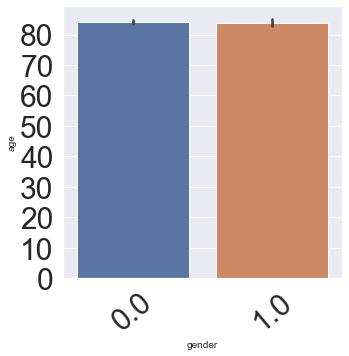

In [69]:
plt.figure(figsize=(5, 5))
data1 = df.sort_values(by=['age'], ascending=False)
sns.barplot(x='gender', y='age', data=data1[:200])
plt.xticks(fontsize=30)
plt.xticks(rotation=40)
plt.yticks(fontsize=30)
plt.xlabel('gender', fontsize= 10)
plt.ylabel('age', fontsize = 10)

In [70]:

#ax = sns.stripplot(x="capital-loss", y="capital-gain", hue="education", data=df)
#ax

**HYPOTHESIS TESTING**

In [71]:
# z_score for sampling distributions
def z_score(sample_size, sample_mean, pop_mean, pop_std):
 numerator = sample_mean - pop_mean
 denomenator = pop_std / sample_size**0.5
 return numerator / denomenator

In [72]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'jobless', 'Other-service', 'Prof-specialty', 'Craft-repair',
       'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales',
       'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners',
       'Armed-Forces'], dtype=object)

In [73]:
df1 = df[(df['occupation']=='Tech-support') | (df['occupation']=='Armed-Forces') | (df['occupation']=='Machine-op-inspct') | (df['occupation']=='Sales')]
df2 = df1[['capital-gain']]

In [74]:
df2.shape[0]

9978

In [75]:
samples = random.sample(range(0, df2.shape[0]), 100)
sample_mean = df2.iloc[samples, 0].mean()
print(sample_mean)

1390.51


In [76]:
std = df['capital-gain'].std()
print(std)

7455.90592106083


In [77]:
# Left Tail - Calculating the z-critical value
confidence_level = 0.97
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha) # Left tailed Z score for 95% Confidence Level
print(z_critical)

1.8807936081512509


In [78]:
# Defining the sample and population parameters
sample_size = 100
sample_mean = sample_mean
pop_mean = df2['capital-gain'].mean()
pop_std = std
print(pop_mean)

892.2169773501704


In [79]:
# Calculating the z-score
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

0.6683198901991138


Text(1390.51, 0.0007, 'x_bar')

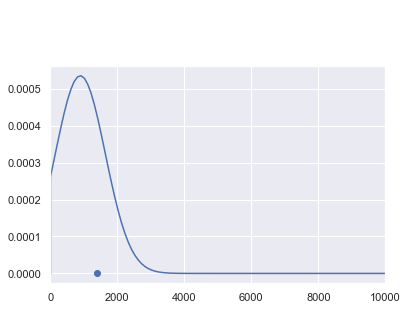

In [80]:
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 0
x_max = 10000
# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5
# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)
# Computing the left critical value (left tailed Test)
z_critical_left = pop_mean - (z_critical * std)
# Shading the left rejection region
x2 = np.linspace(x_min, z_critical_left, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')
# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [81]:
if(np.abs(z) > z_critical):
 print("Reject Null Hypothesis")
else:
 print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [82]:
# Conclusion using p test
p_value = 2 * (1.0 - norm.cdf(np.abs(z)))
print("p_value = ", p_value)
if(p_value < alpha):
 print("Reject Null Hypothesis")
else:
 print("Fail to reject Null Hypothesis")

p_value =  0.503929419506358
Fail to reject Null Hypothesis


**Conclusion - After hypothesis testing we can see that people who are at the post of Tech-support or
Armed-Forces or Machine-op-inspct or sales are getting bettter capital gain.**


Text(0.5, 0, 'occupation')

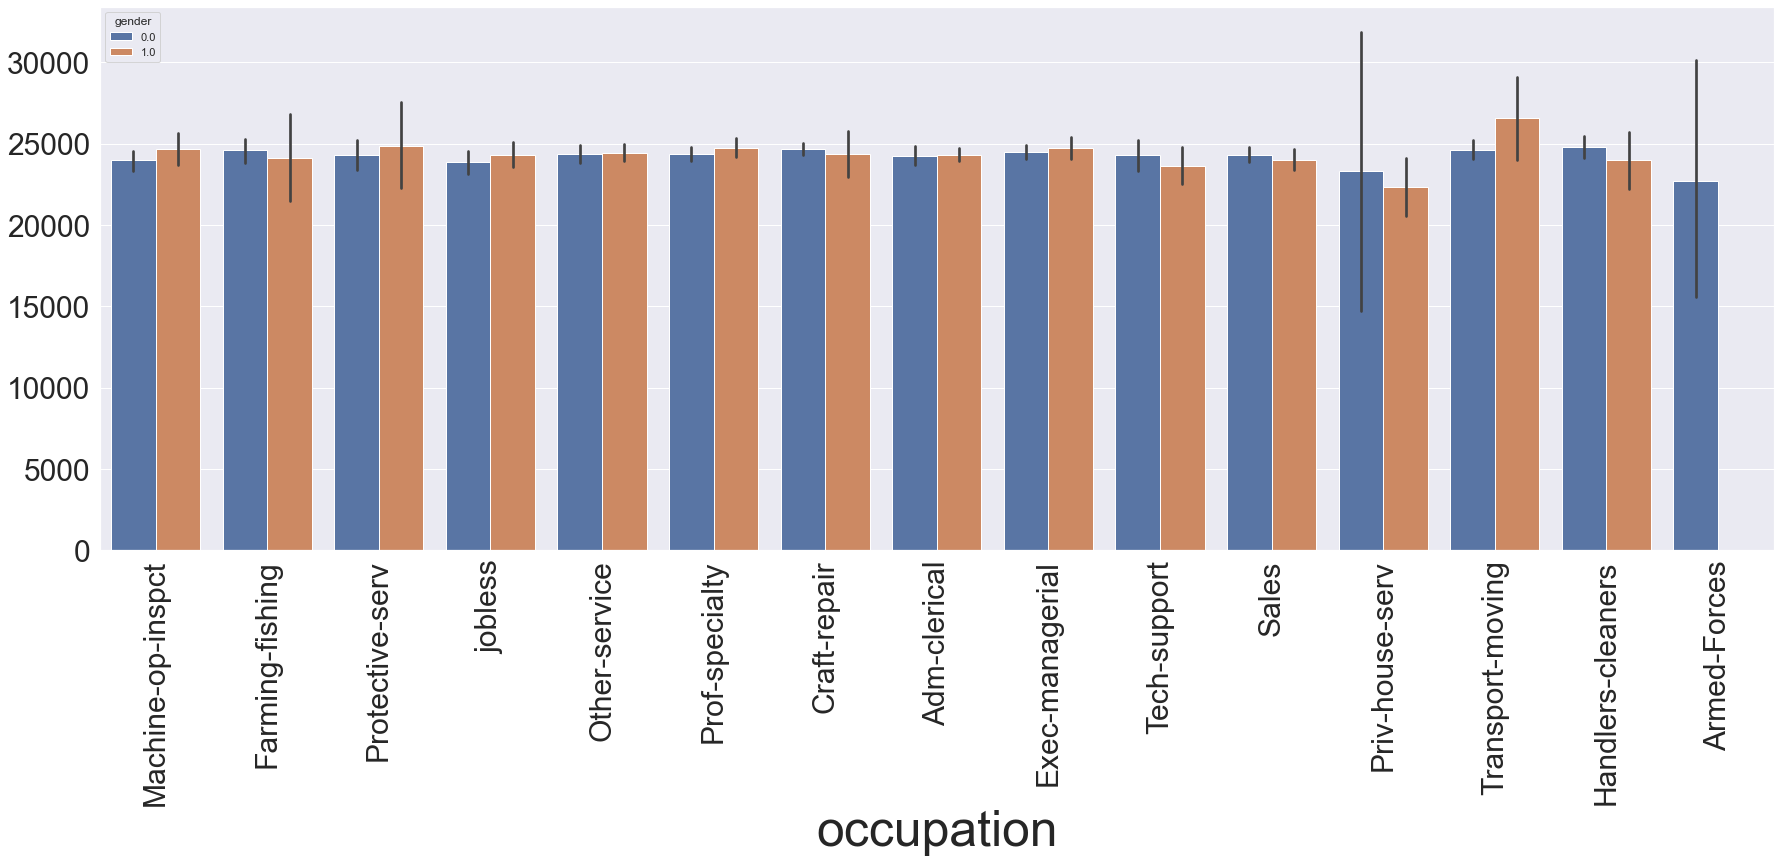

In [83]:
plt.figure(figsize=(30, 10))
sns.barplot(x='occupation', y=df.index, data=df, hue='gender')
plt.xticks(fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
plt.xlabel('occupation', fontsize= 50)

**Chi2 Test**

In [84]:
# Step - 2 => Looking at the freqency distribution
pd.crosstab(df.occupation, df.gender, margins=True)

gender,0.0,1.0,All
occupation,,,
Adm-clerical,1842,3764,5606
Armed-Forces,15,0,15
Craft-repair,5779,323,6102
Exec-managerial,4334,1748,6082
Farming-fishing,1390,95,1485
Handlers-cleaners,1817,254,2071
Machine-op-inspct,2214,803,3017
Other-service,2222,2697,4919
Priv-house-serv,14,226,240


In [85]:
 # These are the observed frequencies
observed = pd.crosstab(df.occupation, df.gender)
observed

gender,0.0,1.0
occupation,,
Adm-clerical,1842,3764
Armed-Forces,15,0
Craft-repair,5779,323
Exec-managerial,4334,1748
Farming-fishing,1390,95
Handlers-cleaners,1817,254
Machine-op-inspct,2214,803
Other-service,2222,2697
Priv-house-serv,14,226


In [86]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies
chi2_contingency(observed)

(8770.171386339205,
 0.0,
 14,
 array([[3747.36798524, 1858.63201476],
        [  10.02684976,    4.97315024],
        [4078.92248412, 2023.07751588],
        [4065.5533511 , 2016.4466489 ],
        [ 992.65812667,  492.34187333],
        [1384.37372412,  686.62627588],
        [2016.73371593, 1000.26628407],
        [3288.13826604, 1630.86173396],
        [ 160.42959623,   79.57040377],
        [4121.03525313, 2043.96474687],
        [ 656.42443124,  325.57556876],
        [3677.18003689, 1823.81996311],
        [ 965.91986063,  479.08013937],
        [1574.21541299,  780.78458701],
        [1875.02090592,  929.97909408]]))

In [87]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df3 = chi2_contingency(observed)[2]

In [88]:
confidence_level = 0.95
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1 - alpha, df3)
chi2_critical


23.684791304840576

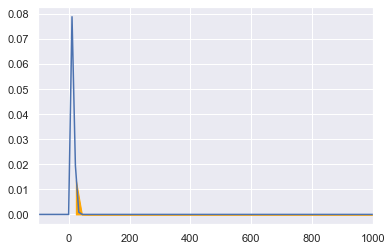

In [89]:
 # Ploting the chi2 distribution to visualise
# Defining the x minimum and x maximum
x_min = -100
x_max = 1000
# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df3)
plt.xlim(x_min, x_max)
plt.plot(x, y)
# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical
# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 50)
y1 = chi2.pdf(x1, df3)
plt.fill_between(x1, y1, color='orange')

In [90]:
if(chi2_test_stat > chi2_critical):
 print("Reject Null Hypothesis")
else:
 print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


In [91]:
if(pval < alpha):
 print("Reject Null Hypothesis")#occupation depends on gender
else:
 print("Fail to Reject Null Hypothesis")#occupation doesnot depends on gender


Reject Null Hypothesis


**Now it's clear that preference of occupation depend on the gender.**

In [92]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,1.0,7,Never-married,Machine-op-inspct,Own-child,Black,0.0,0,0,40,United-States,0
1,38,Private,89814,11.0,9,Married-civ-spouse,Farming-fishing,Husband,White,0.0,0,0,50,United-States,0
2,28,Local-gov,336951,7.0,12,Married-civ-spouse,Protective-serv,Husband,White,0.0,0,0,40,United-States,1
3,44,Private,160323,15.0,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0.0,7688,0,40,United-States,1
4,18,others,103497,15.0,10,Never-married,jobless,Own-child,White,1.0,0,0,30,United-States,0
5,34,Private,198693,0.0,6,Never-married,Other-service,Not-in-family,White,0.0,0,0,30,United-States,0
6,29,others,227026,11.0,9,Never-married,jobless,Unmarried,Black,0.0,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,14.0,15,Married-civ-spouse,Prof-specialty,Husband,White,0.0,3103,0,32,United-States,1
8,24,Private,369667,15.0,10,Never-married,Other-service,Unmarried,White,1.0,0,0,40,United-States,0
9,55,Private,104996,5.0,4,Married-civ-spouse,Craft-repair,Husband,White,0.0,0,0,10,United-States,0


In [93]:
df1=df

In [94]:
df2=df1.drop(['workclass','marital-status','occupation','relationship','native-country','race'], axis = 1)

In [95]:
df2

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,1.0,7,0.0,0,0,40,0
1,38,89814,11.0,9,0.0,0,0,50,0
2,28,336951,7.0,12,0.0,0,0,40,1
3,44,160323,15.0,10,0.0,7688,0,40,1
4,18,103497,15.0,10,1.0,0,0,30,0
...,...,...,...,...,...,...,...,...,...
48837,27,257302,7.0,12,1.0,0,0,38,0
48838,40,154374,11.0,9,0.0,0,0,40,1
48839,58,151910,11.0,9,1.0,0,0,40,0
48840,22,201490,11.0,9,0.0,0,0,20,0


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48790 non-null  int64  
 1   fnlwgt           48790 non-null  int64  
 2   education        48790 non-null  float64
 3   educational-num  48790 non-null  int64  
 4   gender           48790 non-null  float64
 5   capital-gain     48790 non-null  int64  
 6   capital-loss     48790 non-null  int64  
 7   hours-per-week   48790 non-null  int64  
 8   income           48790 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 4.7+ MB


In [97]:
X=df2.iloc[:,0:8]
y=df2.iloc[:,8]

In [98]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36592, 8), (36592,), (12198, 8), (12198,))

**Feature Selection**

**Method 1 : Correlations**

In [99]:
corr=X_train.corr()

<AxesSubplot:>

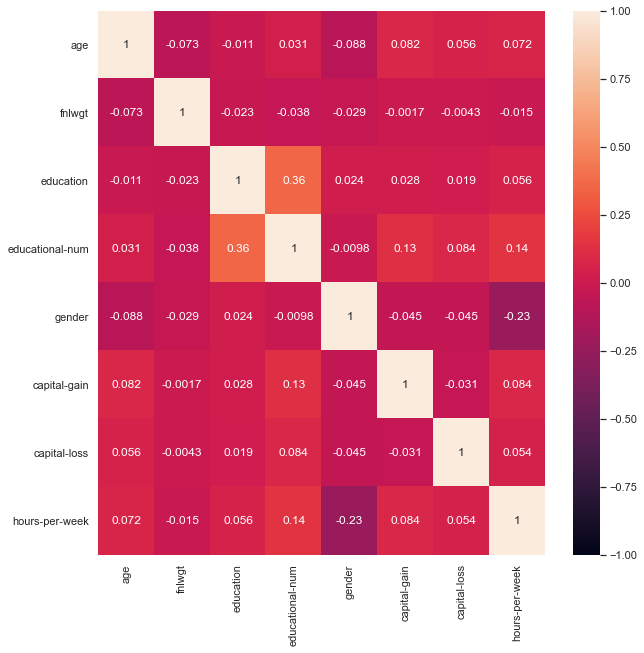

In [100]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr, annot = True, fmt='.2g', vmin=-1, vmax=1)

In [101]:
threshold=0.07

In [102]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [103]:
cor_fe=correlation(X_train,threshold)
print(cor_fe)
len(cor_fe)

{'capital-gain', 'educational-num', 'hours-per-week', 'gender', 'fnlwgt', 'capital-loss'}


6

In [104]:
X_train_cor=X_train.drop(cor_fe,axis=1)
X_test_cor=X_test.drop(cor_fe,axis=1)

Dataset of features after using Correlation for feature selection

In [105]:
X_train_cor.shape ,X_test_cor.shape

((36592, 2), (12198, 2))

**Method 2 : Information Gain**

In [106]:
from sklearn.feature_selection import mutual_info_classif

In [107]:
mutual_info=mutual_info_classif(X_train,y_train)

In [108]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

capital-gain       0.082753
education          0.067762
age                0.067074
educational-num    0.062135
hours-per-week     0.039915
capital-loss       0.039385
fnlwgt             0.033800
gender             0.030906
dtype: float64

In [109]:
IG_col=set(mutual_data.sort_values(ascending=False).index[0:15])

In [110]:
X_train_IG=X_train[IG_col]
X_test_IG=X_test[IG_col]

**Dataset of features after using Information Gain for feature selection**

In [111]:
X_train_IG.shape ,X_test_IG.shape

((36592, 8), (12198, 8))

**Method 3 : Feature Importance**

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [113]:
print(model.feature_importances_)

[0.20766139 0.36375087 0.03186174 0.08639051 0.04249538 0.11074405
 0.03876251 0.11833354]


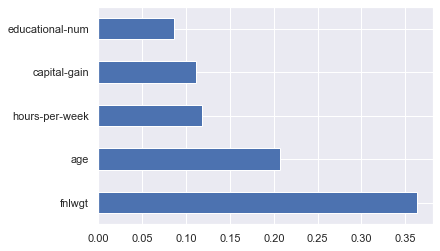

In [114]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(5).plot(kind='barh')
plt.show()

In [115]:
FI_fe=set(ranked_features.nlargest(5).index)

Dataset of features after using Feature Importance for feature selection

In [116]:
X_train_FI=X_train[FI_fe]
X_test_FI=X_test[FI_fe]

In [117]:
X_train_FI.shape,X_test_FI.shape

((36592, 5), (12198, 5))

**Build Predictive Model**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing

from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # For Hyperameter Tuning
from sklearn.model_selection import cross_val_score
# from datetime import datetime


from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import precision_score, recall_score ,f1_score , accuracy_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc,plot_confusion_matrix

In [ ]:
Final_table={}

**Classifier 1: SVM**
<p>1 - All features , dataset: X_train , X_test</p>
<p>2 - Correlation , dataset: X_train_cor , X_test_cor</p>
<p>3 - Information Gain , dataset: X_train_IG , X_test_IG</p>
<p>4 - Feature Importance , dataset: X_train_FI , X_test_FI</p>

In [ ]:
# Parameters for SVM classifier 

params_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [ ]:
from sklearn.svm import SVC

# Creating SVM models

clf_svm1 = SVC(probability=True)

clf_svm2 = SVC(probability=True)

clf_svm3 = SVC(probability=True)

clf_svm4 = SVC(probability=True)

In [ ]:
# Hyperparameter tuning

grid_search_svm1=RandomizedSearchCV(clf_svm1,param_distributions=params_svm,
                                 scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
grid_search_svm2=RandomizedSearchCV(clf_svm2,param_distributions=params_svm,
                                 scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
grid_search_svm3=RandomizedSearchCV(clf_svm3,param_distributions=params_svm,
                                 scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
grid_search_svm4=RandomizedSearchCV(clf_svm4,param_distributions=params_svm,
                                 scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
# Searching for parameters
grid_search_svm1.fit(X_train, y_train)
grid_search_svm2.fit(X_train_cor, y_train)
grid_search_svm3.fit(X_train_IG, y_train)
grid_search_svm4.fit(X_train_FI, y_train)

In [ ]:
# Assigining best parameters to models

clf_svm1 = grid_search_svm1.best_estimator_

clf_svm2 = grid_search_svm2.best_estimator_

clf_svm3 = grid_search_svm3.best_estimator_

clf_svm4 = grid_search_svm4.best_estimator_

In [ ]:
# Testing Data

classifier_score_svm1 = clf_svm1.score(X_test, y_test)
classifier_score_svm2 = clf_svm2.score(X_test_cor, y_test)
classifier_score_svm3 = clf_svm3.score(X_test_IG, y_test)
classifier_score_svm4 = clf_svm5.score(X_test_FI, y_test)

In [ ]:
classifier_score_svm1,classifier_score_svm2,classifier_score_svm3,classifier_score_svm4

In [ ]:
# Predicted Outputs

y_pred_svm1 = clf_svm1.fit(X_train, y_train).predict(X_test)
y_pred_svm2 = clf_svm2.fit(X_train_cor, y_train).predict(X_test_cor)
y_pred_svm3 = clf_svm3.fit(X_train_IG, y_train).predict(X_test_IG)
y_pred_svm4 = clf_svm5.fit(X_train_FI, y_train).predict(X_test_FI)

In [ ]:
# Confusion matrix for SVM Model 1

plot_confusion_matrix(clf_svm1, X_test, y_test,cmap='Purples')
plt.title('SVM with all features')
plt.show()

In [ ]:
# Confusion Matrix for SVM Model 2 3 4 

svm_classifiers=[clf_svm2,clf_svm3,clf_svm4]
svm_test_data=[X_test_cor,X_test_IG,,X_test_FI]
svm_titles=['SVM_cor','SVM_IG','SVM_FI']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,10))
for cls, ax,Xtest,title in zip(svm_classifiers, axes.flatten(),svm_test_data,svm_titles):
    plot_confusion_matrix(cls, Xtest, y_test, ax=ax, cmap='Purples')
    ax.set_title(title)
    
plt.tight_layout()  
plt.show()

In [ ]:
# Adding Data to Dict

Final_table['SVM']=[accuracy_score(y_test,y_pred_svm1),precision_score(y_test,y_pred_svm1),
                    recall_score(y_test,y_pred_svm1),f1_score(y_test,y_pred_svm1)]
                    
Final_table['SVM_cor']=[accuracy_score(y_test,y_pred_svm2),precision_score(y_test,y_pred_svm2),
                    recall_score(y_test,y_pred_svm2),f1_score(y_test,y_pred_svm2)]

Final_table['SVM_IG']=[accuracy_score(y_test,y_pred_svm3),precision_score(y_test,y_pred_svm3),
                    recall_score(y_test,y_pred_svm3),f1_score(y_test,y_pred_svm3)]
Final_table['SVM_FI']=[accuracy_score(y_test,y_pred_svm4),precision_score(y_test,y_pred_svm4),
                    recall_score(y_test,y_pred_svm5),f1_score(y_test,y_pred_svm5)]

In [ ]:
scores_df = pd.DataFrame(data = Final_table) 
scores_df_T = scores_df.transpose()
scores_df_T.columns = ['accuracy', 'precision', 'recall', 'F1']
scores_df_T

In [ ]:
scores_df_T.to_csv('Final_Output', header=True, index=True)

In [ ]:
final=(scores_df_T.nlargest(5,'accuracy'))
final

In [ ]:
ax = plt.gca()

In [ ]:
SVM_cor_disp = plot_roc_curve(clf_svm2, X_test_cor, y_test, ax=ax)

In [ ]:
final.plot(kind='bar',figsize=(20,10))
plt.grid(which='both')

In [ ]:
scores_df_T.plot(kind='barh',figsize=(20,50))
plt.grid(which='both')